In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [ ]:
!pip install openpyxl 

In [ ]:
df = pd.read_excel(r'/content/drive/MyDrive/Dataset/TopicExtraction/Pubmed5k.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleID  4999 non-null   int64 
 1   Title      4999 non-null   object
 2   Abstract   4999 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [ ]:
df[df.isna().any(axis=1)]

,ArticleID,Title,Abstract


In [ ]:
df.sample(5)

,ArticleID,Title,Abstract
3105,34811102,Illustrated key to the genera and catalogue of...,"Separate identification keys for females, and ..."
4794,34425556,A practical guidance on the use of intravenous...,We aim to provide a practical guidance on the ...
4552,34375198,Occupational risk of organophosphates and othe...,"Occupational exposure to oil fumes, organophos..."
932,34322129,SARS-CoV-2 Vaccines Based on the Spike Glycopr...,Coronavirus 19 Disease (COVID-19) originating ...
4121,34311367,A novel workflow utilizing open-source softwar...,The aim of this study is to utilize novel and ...


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words=set(nltk.corpus.stopwords.words('english'))
le=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import re

def clean_text(line):
  word_tokens = word_tokenize(line.lower())
  tokens = [le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  tokens = [re.sub('[^a-zA-Z0-9]+', '', t) for t in tokens]
  tokens = [t for t in tokens if not t.isdigit()]
  tokens = [t for t in tokens if len(t)>3]
  cleaned_line = " ".join(tokens)
  return cleaned_line

In [ ]:
df['cleaned_Abstract'] = df['Abstract'].apply(clean_text)

In [ ]:
# plt.figure(figsize = (12,6))
# sns.countplot(df["cleaned_Abstract"], palette='Set3')

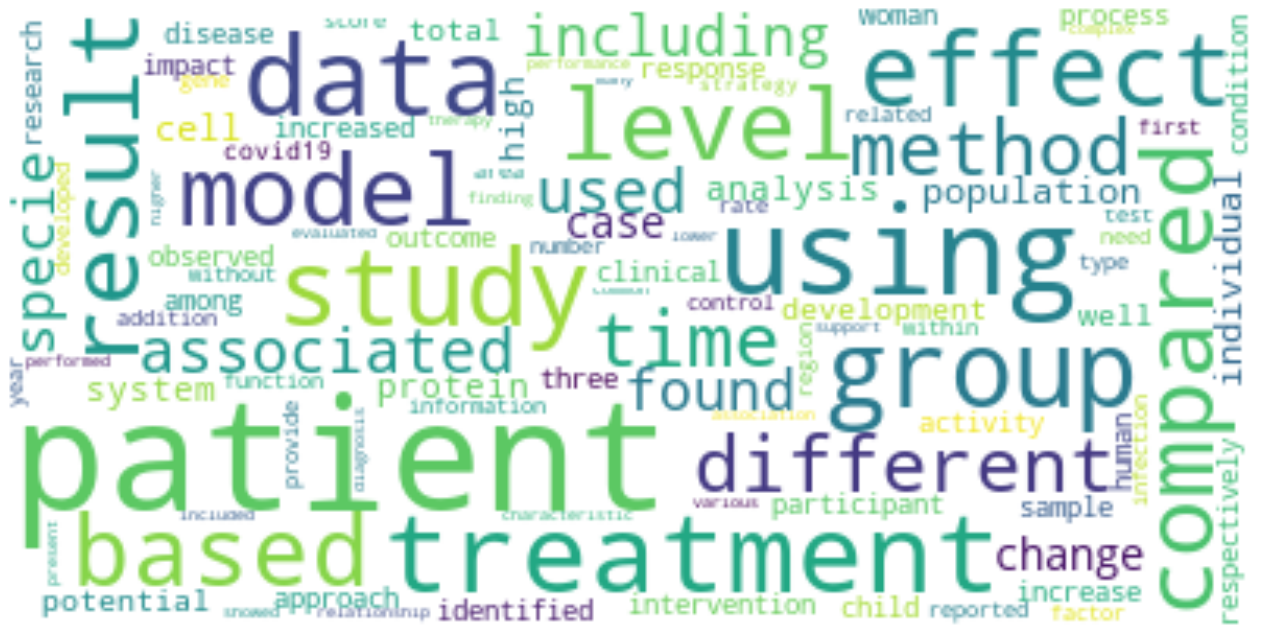

In [ ]:
from wordcloud import WordCloud

text = " ".join(cat for cat in df["cleaned_Abstract"])

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)

In [ ]:
vect_text=vect.fit_transform(df['cleaned_Abstract'])

In [ ]:
vect_text.shape

(4999, 1000)

In [ ]:
idf = vect.idf_

In [ ]:
corpus_weights = dict(zip(vect.get_feature_names(), idf))
corpus_weights

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'ability': 4.101092789211817,
 'able': 4.6969116258112,
 'absence': 4.755019256618482,
 'access': 4.280751228586288,
 'according': 3.8682189532550315,
 'accuracy': 4.313186504339442,
 'accurate': 4.619353391465326,
 'achieve': 4.807662990103903,
 'achieved': 4.582719258285545,
 'acid': 3.9917402522844534,
 'across': 3.6063965473757102,
 'action': 4.66516292749662,
 'activation': 4.55434856115633,
 'active': 4.369698714602784,
 'activity': 3.155890713843242,
 'acute': 3.983803702688717,
 'addition': 3.486507931154974,
 'additional': 4.24933503235291,
 'additionally': 4.435788826431775,
 'address': 4.218875824868201,
 'adherence': 5.390058806371146,
 'adjusted': 4.611918412977808,
 'administration': 4.995404614367198,
 'admission': 4.9738984091462335,
 'adolescent': 5.135166556742356,
 'adult': 3.491327217590923,
 'advanced': 4.713172146682981,
 'advantage': 4.789805372703897,
 'adverse': 4.393229212012979,
 'affect': 4.049133050281107,
 'affected': 4.128121461599736,
 'aged': 4.0449225

In [ ]:
sorted_corpus_list = sorted(corpus_weights, key=(corpus_weights).get)
print(sorted_corpus_list)
print(sorted_corpus_list[0], sorted_corpus_list[-1])

['study', 'using', 'patient', 'result', 'used', 'analysis', 'data', 'however', 'also', 'effect', 'group', 'health', 'associated', 'disease', 'treatment', 'year', 'clinical', 'level', 'compared', 'significant', 'factor', 'different', 'among', 'model', 'high', 'based', 'time', 'including', 'showed', 'method', 'found', 'risk', 'higher', 'present', 'significantly', 'total', 'potential', 'system', 'research', 'included', 'increased', 'cell', 'outcome', 'change', 'rate', 'well', 'case', 'development', 'first', 'important', 'performed', 'control', 'finding', 'difference', 'three', 'identified', 'conducted', 'increase', 'review', 'sample', 'role', 'approach', 'activity', 'could', 'population', 'number', 'provide', 'need', 'respectively', 'impact', 'type', 'care', 'observed', 'response', 'process', 'reported', 'individual', 'human', 'covid19', 'identify', 'related', 'participant', 'lower', 'condition', 'strategy', 'within', 'test', 'specie', 'mechanism', 'aimed', 'function', 'information', 'sho

In [ ]:
def get_elbow_graph():
  distortions = []
  inertias = []
  mapping1 = {}
  mapping2 = {}
  K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

# LSA

In [ ]:
from sklearn.decomposition import TruncatedSVD

lsa_model = TruncatedSVD(n_components=3, algorithm='randomized', n_iter=10, 
                         random_state=2)
lsa_top=lsa_model.fit_transform(vect_text)

In [ ]:
print(lsa_top.shape) 

(4999, 3)


In [ ]:
print("Document 0 :")
for i, topic in enumerate(lsa_top[0]):
  print("Topic ", i, " : ", topic*100)

Document 0 :
Topic  0  :  17.441951175908972
Topic  1  :  -2.7160927112628612
Topic  2  :  -3.3175379343173397


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



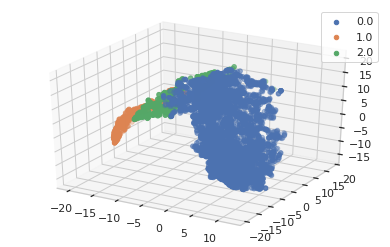

In [ ]:
from sklearn.manifold import TSNE
import pylab
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook


tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(lsa_top)

#x, y, z = list(zip(*projections))

vis_df = projections.copy()
topics = np.argmax(lsa_top, axis=1).reshape(-1,1)
vis_df = np.hstack((vis_df, topics))
vis_df = pd.DataFrame(data=vis_df, columns=['x', 'y', 'z', 
                                                            'topic'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for t in vis_df.topic.unique():
    ax.scatter(vis_df.x[vis_df.topic==t], 
               vis_df.y[vis_df.topic==t], 
               vis_df.z[vis_df.topic==t],
               label=t)
    
ax.legend()

In [ ]:
def draw_word_cloud(model, index):
  imp_words_topic=""
  comp=model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
 

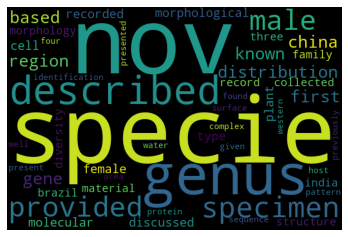

In [ ]:
draw_word_cloud(lsa_model, 1)

In [ ]:
print(lsa_model.components_.shape)

(3, 1000)


In [ ]:
vocab = vect.get_feature_names_out()

num_top_words = 10
for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:num_top_words]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")
         

Topic 0: 
patient study group cell health treatment covid19 disease data analysis 

Topic 1: 
specie nov genus described specimen provided male distribution based china 

Topic 2: 
cell protein expression gene cancer tumor human mechanism tissue mouse 



# LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model=LatentDirichletAllocation(n_components=3, learning_method='online',
                                    random_state=2, max_iter=10) 

In [ ]:
lda_top = lda_model.fit_transform(vect_text)

In [ ]:
print(lda_top.shape) 

(4999, 3)


In [ ]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)  

1.0


In [ ]:
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
    print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  8.523229672498076 %
Topic  1 :  84.98128740134997 %
Topic  2 :  6.49548292615196 %


In [ ]:
from sklearn.manifold import TSNE
import pylab
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

tsne = TSNE(n_components=3, random_state=0)
projections = tsne.fit_transform(lda_top)

#x, y, z = list(zip(*projections))

vis_df = projections.copy()
topics = np.argmax(lsa_top, axis=1).reshape(-1,1)
vis_df = np.hstack((vis_df, topics))
vis_df = pd.DataFrame(data=vis_df, columns=['x', 'y', 'z', 
                                                            'topic'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for t in vis_df.topic.unique():
    ax.scatter(vis_df.x[vis_df.topic==t], 
               vis_df.y[vis_df.topic==t], 
               vis_df.z[vis_df.topic==t],
               label=t)
    
ax.legend()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
draw_word_cloud(lda_model, 0)

In [ ]:
print(lda_model.components_.shape)

(3, 1000)


In [ ]:
vocab = vect.get_feature_names_out()

num_top_words = 10
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:num_top_words]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")
         

Topic 0: 
specie method model genus based nov data using system water 

Topic 1: 
patient health study covid19 group risk care case year outcome 

Topic 2: 
cell gene protein expression cancer tumor pathway tissue mechanism disease 



# LDA Gensim

In [ ]:
tokens_list = df["cleaned_Abstract"].apply(lambda x: x.split())

In [ ]:
from gensim import corpora, models

dictionary_LDA = corpora.Dictionary(tokens_list)
dictionary_LDA.filter_extremes(no_below=3)

In [ ]:
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in tokens_list]

num_topics = 3
lda_model = models.LdaModel(corpus, num_topics=num_topics, 
                            id2word=dictionary_LDA, 
                            passes=4, alpha=[0.01]*num_topics, 
                            eta=[0.01]*len(dictionary_LDA.keys()))

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning:

divide by zero encountered in log



In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=a3204d63808456a43b5a3a39de5ed5f58ee46e320e4d477f5b82e650dc24b9f7
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
%matplotlib inline
import pyLDAvis
from pyLDAvis.gensim_models import prepare

vis = prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

